# Text Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Getting Raw Data
df = pd.read_csv("/Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/Data/UScomments.csv", error_bad_lines = False)







/var/folders/mz/d983zsq553d4r2cy43740dd80000gn/T/ipykernel_38223/521096186.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/Data/UScomments.csv", error_bad_lines = False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/var/folders/mz/d983zsq553d4r2cy43740dd80000gn/T/ipykernel_38223/521096186.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/Data/UScomments.csv", error_bad_lines = False)


In [6]:
df

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


### ETL(Extract,Transform, Load)

In [7]:
# To check if there are any missing values
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [8]:
#Drop Missing value rows 
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### Perform Sentiment Analysis
Now we will perform the Sentimental Analysis over the given data
We will calculate the Polarity which rnages between [-1,1], where -1 is the negative sentiment 
and 1 ia the +ve sentiment 

In [10]:
from textblob import TextBlob

In [11]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [12]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [13]:
df.shape

(691375, 4)

In [14]:
polarity = []
for line in df['comment_text']:
    try:
        polarity.append(TextBlob(line).sentiment.polarity)
    except:
        ploarity.append(0)

In [15]:
len(polarity)

691375

In [16]:
df['polarity'] = polarity

In [17]:
df

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
...,...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0,0.0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,0.0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,0.0
691398,EoejGgUNmVU,Islığı yeter...,0,0,0.0


### WordCloud - Graphical representation of text frequency

In [18]:
filter1 = df['polarity'] ==1

In [19]:
comments_positive = df[filter1]

In [20]:
filter2 = df['polarity'] ==-1

In [21]:
comments_negative = df[filter2]
comments_negative

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [22]:
from wordcloud import WordCloud, STOPWORDS

In [23]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [24]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [25]:
type(df['comment_text'])

pandas.core.series.Series

In [26]:
# To make the wordcloud for +ve comments
total_column_positive = ' '.join(comments_positive['comment_text'])

In [27]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_column_positive)

(-0.5, 399.5, 199.5, -0.5)

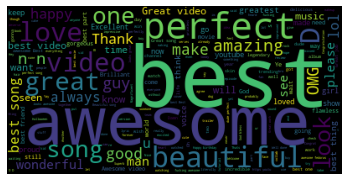

In [28]:
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

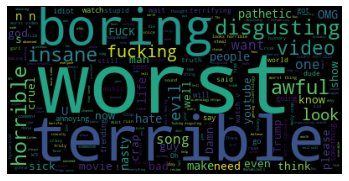

In [29]:
# To make the wordcloud for -ve comments
total_column_negative = ' '.join(comments_negative['comment_text'])
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_column_negative)
plt.imshow(wordcloud)
plt.axis('off')

### Perform Emoji's Analysis

In [30]:
#!pip install emoji==2.2.0

In [31]:
import emoji 

In [32]:
emoji.__version__

'2.2.0'

In [33]:
df["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [34]:
comment = 'trending 😉'

In [35]:
# this is for a single line of text

all_emoji_list = []

for comment in df['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

In [36]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [37]:
# Now we will count the number of same emoji's in the list

from collections import Counter

In [38]:
Counter(all_emoji_list).most_common(5)

[('😂', 36987), ('😍', 33453), ('❤', 31119), ('🔥', 8694), ('😭', 8398)]

In [39]:
# To get the specific count of a particulat emoji
Counter(all_emoji_list).most_common(10)[1][1]

33453

In [40]:
#No we will create the list of totla counts of emoji's
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [46]:
freq = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

### Visualizing the Emojis on chart

In [47]:
# Install this library if not in your jupyter environment
#!pip install plotly

In [48]:
# Visualize the data
import plotly.graph_objs as go
from plotly.offline import iplot

In [49]:
trace = go.Bar(x=emojis, y=freq)
iplot([trace])

### Collecting the data form multiple files 

In [104]:
import os

In [105]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [106]:
# To check the current Directory
os.getcwd()
# To change the Directory
os.chdir('/Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/Youtube_project_shan_singh_Udemy/additional_data')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/Youtube_project_shan_singh_Udemy/additional_data'

In [107]:
files = os.listdir()
files

['Youtube_project_shan_singh_Udemy.rar',
 '.DS_Store',
 'Text Data Analysis.ipynb',
 '.ipynb_checkpoints',
 'Data']

In [108]:
files_csv = [file for file in files if '.csv' in file]
files_csv

[]

In [110]:
full_df = pd.DataFrame()
path = r'/Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/Youtube_project_shan_singh_Udemy/additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding = 'iso-8859-1',error_bad_lines= False)
    
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [111]:
full_df.shape

(0, 0)

In [112]:
full_df

""


### Removing Duplicate Data

In [113]:
full_df[full_df.duplicated()].shape

(0, 0)

In [114]:
full_df = full_df.drop_duplicates()

In [115]:
full_df.shape

(0, 0)

### Extract the Data into different Format files

In [116]:
# Extracting the CSV format
full_df[0:1000].to_csv(r'/Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/data/Youtube_sample.csv', index=False)                





In [117]:
# Extracting the JSON format
full_df[0:1000].to_json(r'/Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/data/Youtube_sample.json')

In [118]:
#Extracting in SQlite format
from sqlalchemy import create_engine

In [119]:
engine = create_engine(r'sqlite:///Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/data/Youtube_sample.sqlite')

In [120]:
#full_df[0:1000].to_sql('Users',con=engine, if_exists='append')

### Which Category has the Maximum Likes!1

In [121]:
json_df = pd.read_json(r'/Users/shyamgoyal/Desktop/UCI/Python Projects/Project 1/data/additional_data/US_category_id.json')
                                              

In [122]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [131]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [132]:
#Now we will create the dictionay to get the id and the title from each row

cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [133]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [134]:
# Now we will add this to our dataframe

full_df['category_name'] = full_df['category_id'].map(cat_dict)

KeyError: 'category_id'

In [127]:
full_df.head(4)

""


In [128]:
plt.figure(figsize=(17,9))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')

ValueError: Could not interpret input 'category_name'

<Figure size 1224x648 with 0 Axes>

### Find out whather the audience is engaged or not

In [83]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

KeyError: 'likes'

In [84]:
full_df.columns

Index([], dtype='object')

In [85]:
plt.figure(figsize=(15,10))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

ValueError: Could not interpret input 'category_name'

<Figure size 1080x720 with 0 Axes>

In [86]:
plt.figure(figsize=(15,10))
sns.regplot(x='views',y='likes', data= full_df)

KeyError: 'views'

<Figure size 1080x720 with 0 Axes>

In [ ]:
# We can also find the correlation 
full_df[['views','likes','dislikes']].corr()

In [ ]:
# We can visualize the correlation
sns.heatmap(full_df[['views','likes','dislikes']].corr(), annot=True)

### Which Channels have the largest number of trending videos!!

In [284]:
full_df['channel_title'].value_counts()
#OR
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [285]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [286]:
cdf.rename(columns={0:'total_videos'})

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


### Does Punctuations in title and tags have any relation with views, likes, dislikes and comments!!

In [297]:
import string

In [298]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [299]:
def punc(text):
    return len([char for char in text if char in string.punctuation])

In [300]:
sample = full_df[0:1000]

In [302]:
sample['count_punc'] = sample['title'].apply(punc)

In [304]:
sample['count_punc']

0      1
1      3
2      1
3      1
4      1
      ..
995    6
996    0
997    7
998    4
999    0
Name: count_punc, Length: 1000, dtype: int64

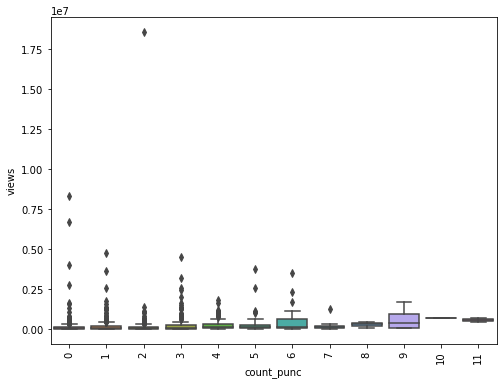

In [309]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc',y='views',data=sample)
plt.xticks(rotation='vertical')
plt.show()